In [1]:
import yaml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('results.yml','r') as f:
    results=yaml.safe_load(f)
model=list(results.keys())

In [3]:
def barChart(model_type:str,method_comparison:str,algorithms:list,accuracy_metrics:str,scores:list):
    plt.rcParams['figure.figsize']=(16,8)
    plt.title(model_type+' Comparison Bar Chart '+'('+method_comparison+')')
    plt.ylabel(model_type+' '+accuracy_metrics+' (%)')
    plt.xlabel(model_type)
    plt.xticks(list(range(len(scores))),labels=algorithms)
    plt.bar(algorithms,scores)
    plt.savefig('BarChart_'+model_type+'_'+method_comparison+'.jpeg',bbox_inches='tight')
    plt.show()
    
def barChart2(model_type:str,algorithms:list,accuracy_metrics:str,scores:list):
    plt.rcParams['figure.figsize']=(10,10)
    plt.title(model_type+' Comparison Bar Chart')
    plt.ylabel(model_type+' '+accuracy_metrics+' (%)')
    plt.xlabel(model_type)
    plt.xticks(list(range(len(scores))),labels=algorithms)
    plt.bar(algorithms,scores)
    plt.savefig('BarChart_'+model_type+'.jpeg',bbox_inches='tight')
    plt.show()

def lineChart(model_type:str,method_comparison:str,algorithms:list,accuracy_metrics:str,scores:list):
    plt.rcParams['figure.figsize']=(16,8)
    plt.title(model_type+' Comparison Line Chart '+'('+method_comparison+')')
    plt.ylabel(model_type+' '+accuracy_metrics+' (%)')
    plt.xlabel(model_type)
    plt.xticks(list(range(len(scores))),labels=algorithms)
    plt.plot(scores,label='Accuracy')
    plt.savefig('LineChart_'+model_type+'_'+method_comparison+'.jpeg',bbox_inches='tight')
    plt.show()
    plt.close()
    
def multipleLineChart(model_type:str,method_comparison:str,algorithms:list,accuracy_metrics:str,scores:list,cv_scores:list):
    plt.rcParams['figure.figsize']=(16,8)
    plt.title(model_type+' Comparison Line Chart '+'('+method_comparison+')')
    plt.ylabel(model_type+' '+accuracy_metrics+' (%)')
    plt.xlabel(model_type)
    plt.xticks(list(range(len(scores))),labels=algorithms)
    plt.plot(scores,label='Accuracy')
    plt.plot(cv_scores,label='CV Accuracy')
    plt.legend()
    plt.savefig('MultipleLineChart_'+model_type+'_'+method_comparison+'.jpeg',bbox_inches='tight')
    plt.show()
    
def groupedBarChart(group,algorithms,model_type:str):
    label_locations=np.arange(len(algorithms))
    bar_width=0.10
    multiplier=0
    plt.rcParams.update({'font.size': 5.5})
    fig,ax=plt.subplots(layout='constrained')
    for attribute, measurement in group.items():
        offset=bar_width*multiplier
        rects=ax.bar(label_locations+offset,measurement,bar_width,label=attribute)
        ax.bar_label(rects,padding=2.5)
        multiplier+=1

    ax.set_ylabel('Performance Scores')
    ax.set_title('Comparisons Of Different Methods across Differnet Algorithms')
    ax.set_xticks(label_locations+bar_width+0.25,algorithms)
    ax.legend(loc='upper left',ncols=1)
    ax.set_ylim(0,100)
    plt.figure(figsize=(20,15))
    plt.savefig('GroupedBarChart_'+model_type+'.jpeg',bbox_inches='tight')
    plt.show()

# Part A

### Comparisons of Baseline Model

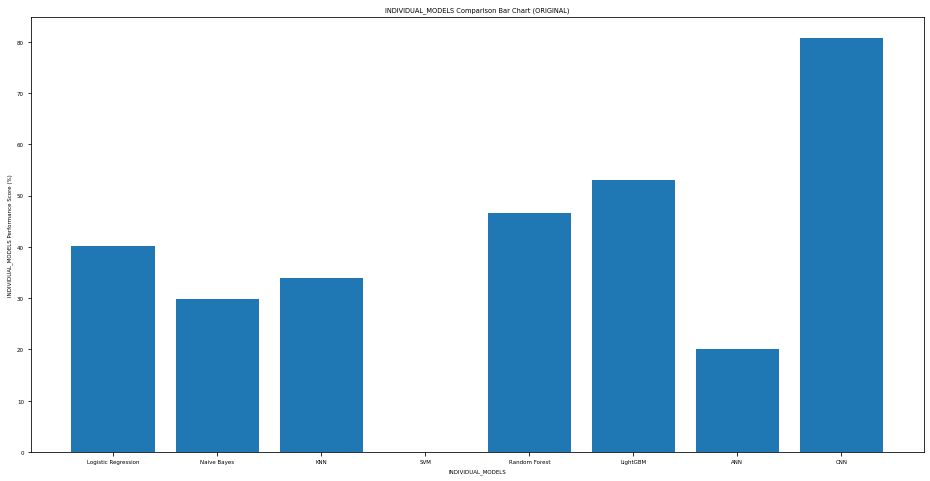

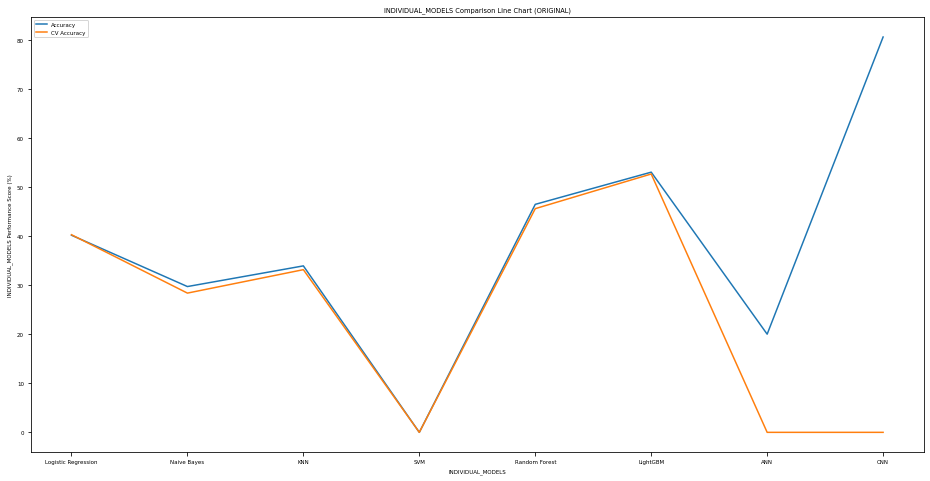

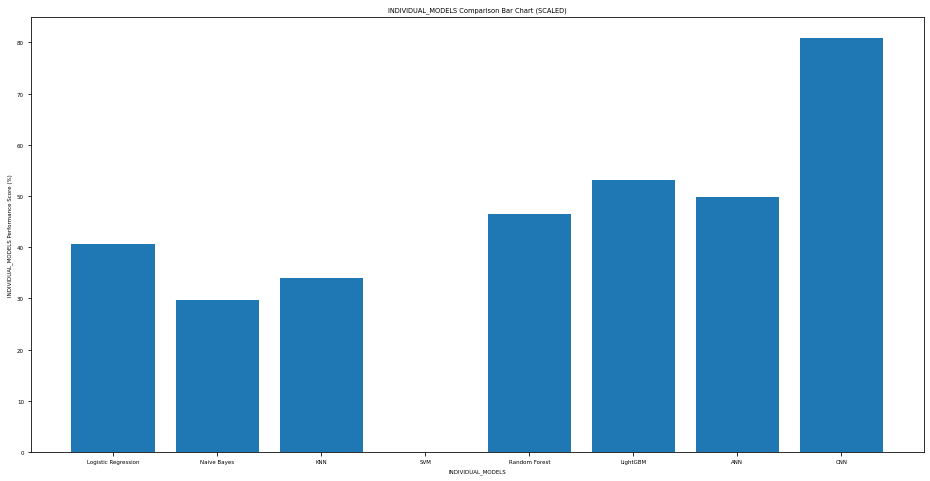

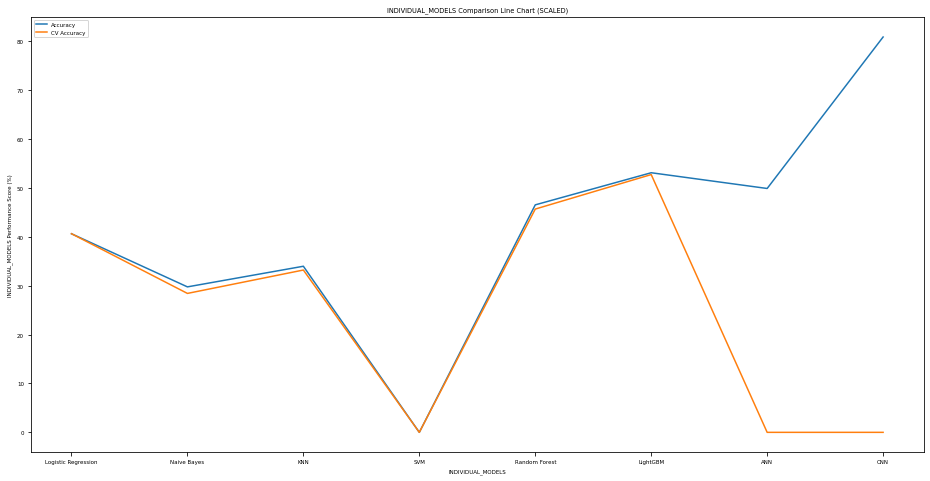

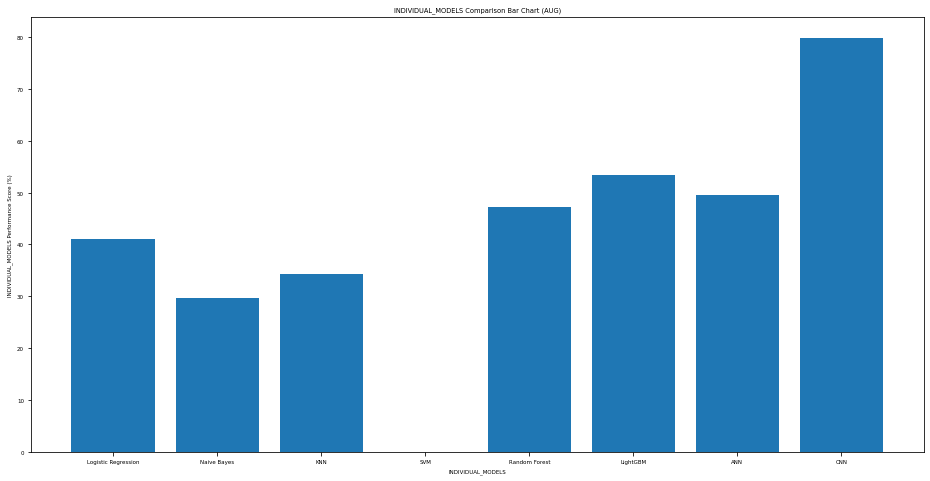

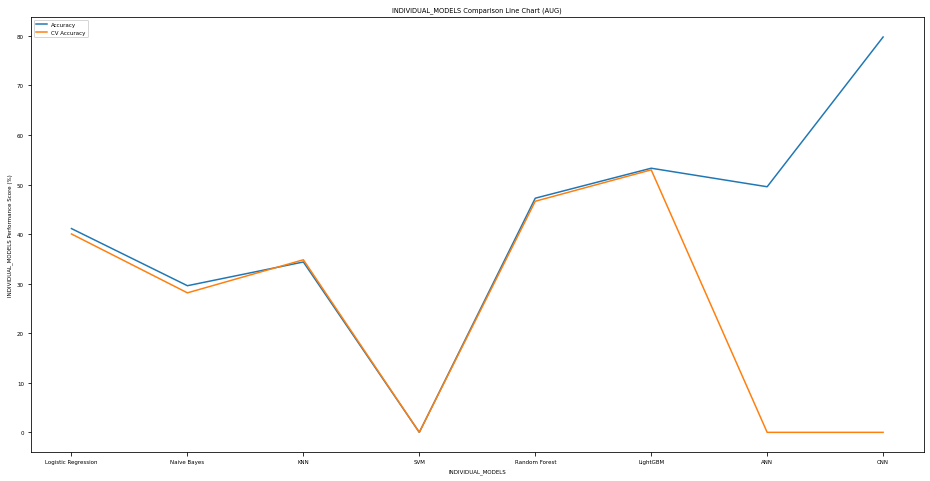

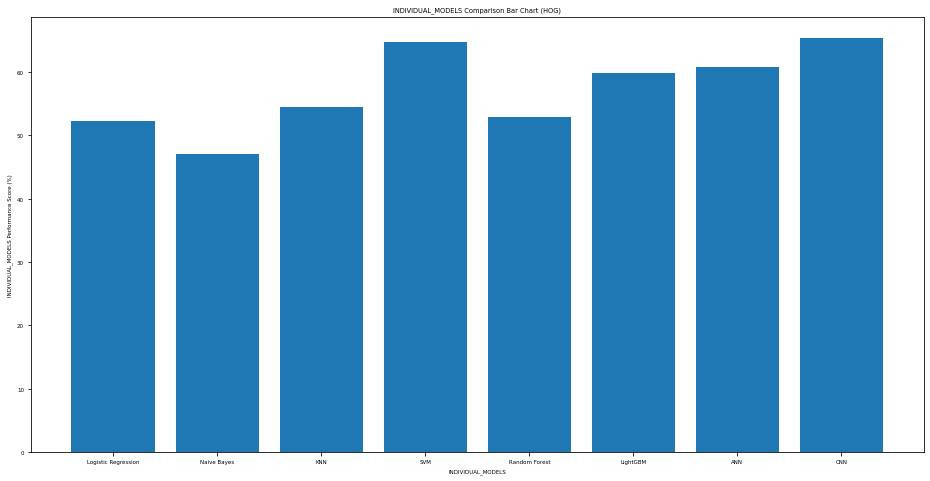

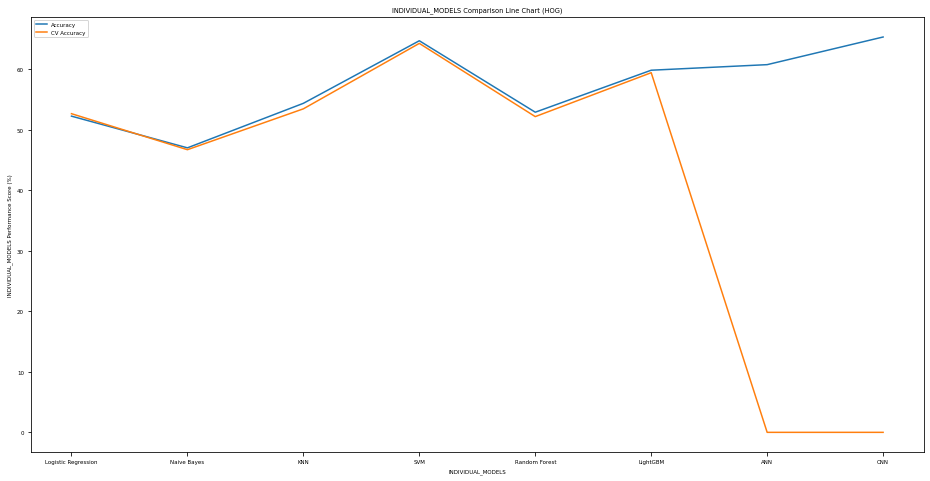

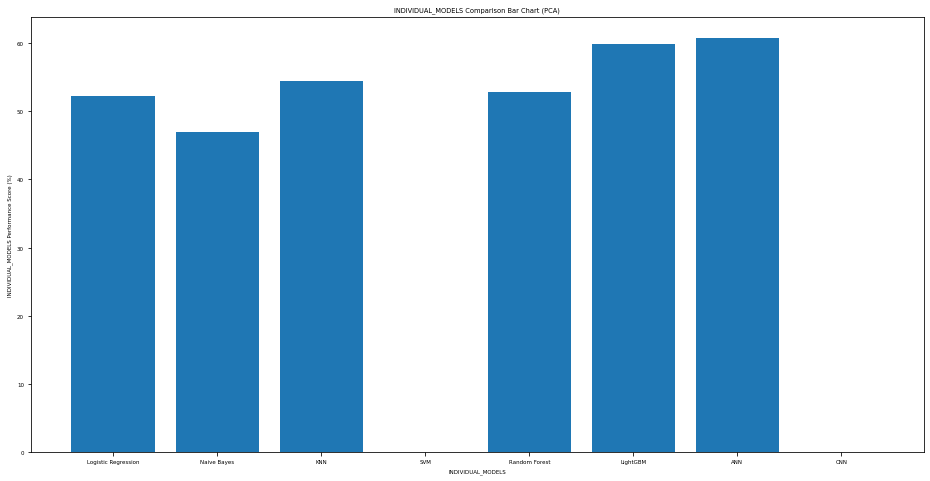

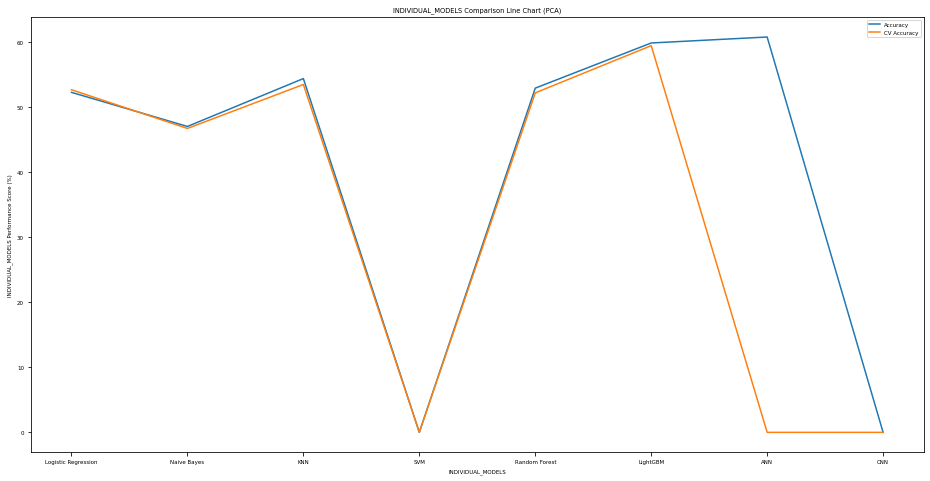

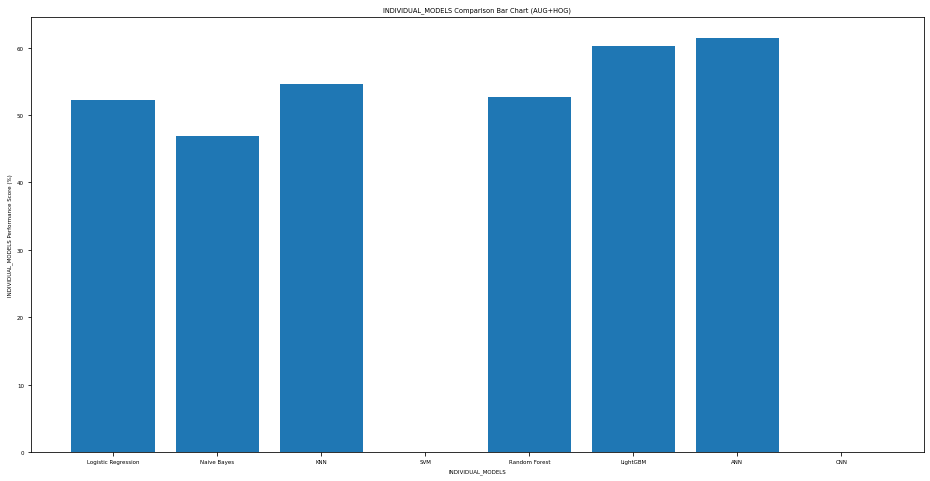

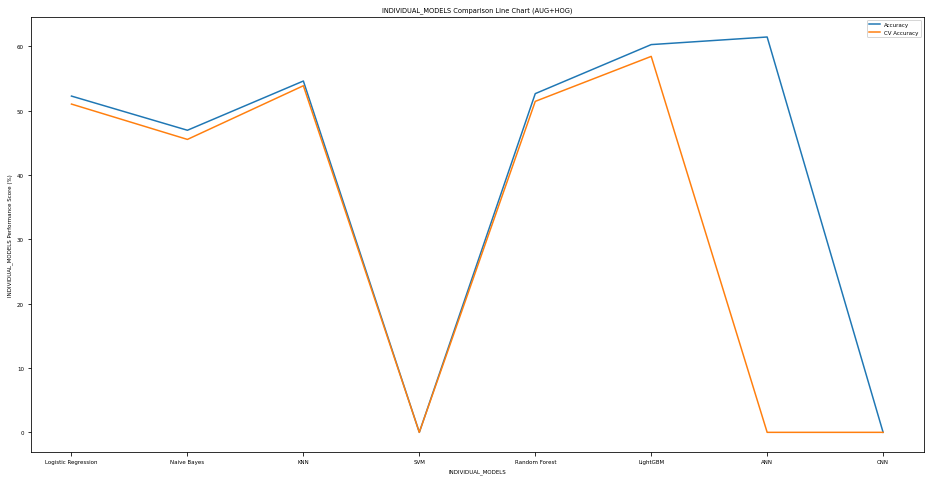

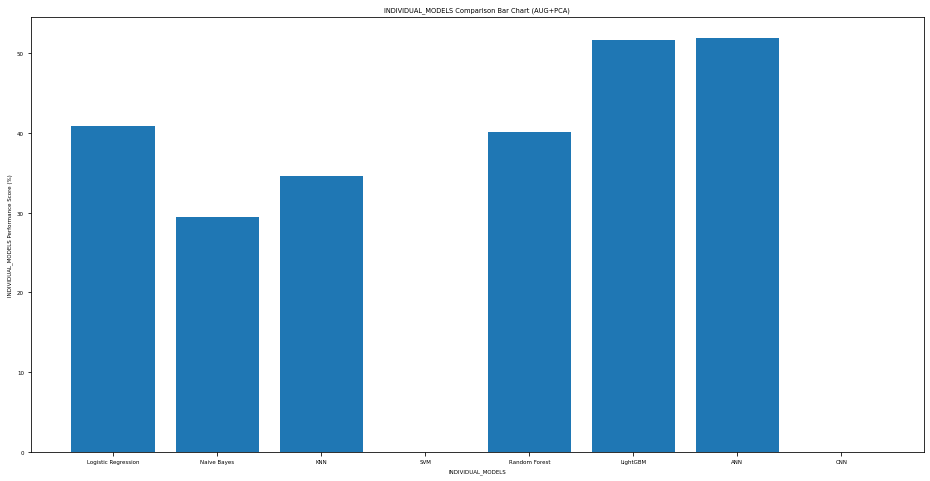

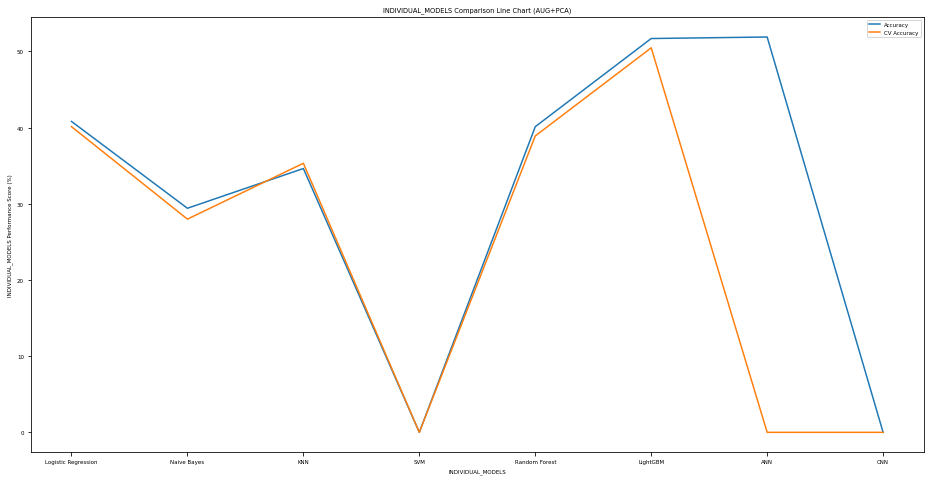

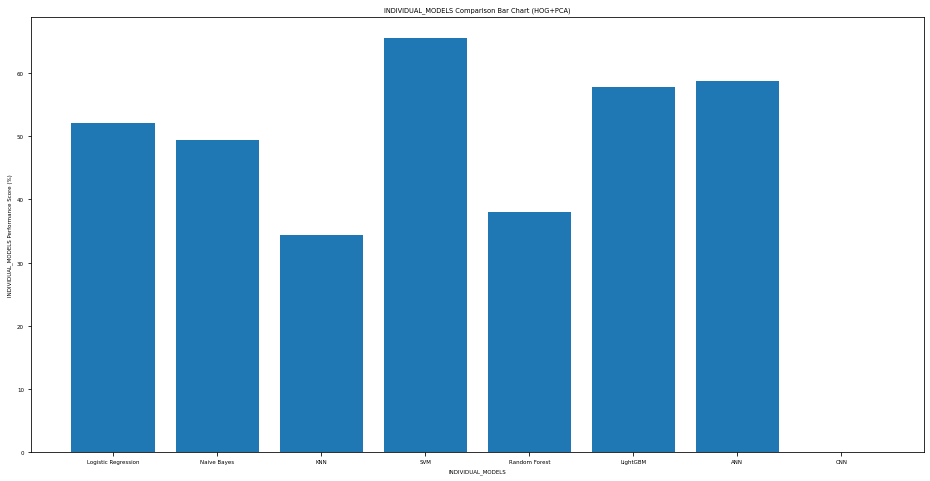

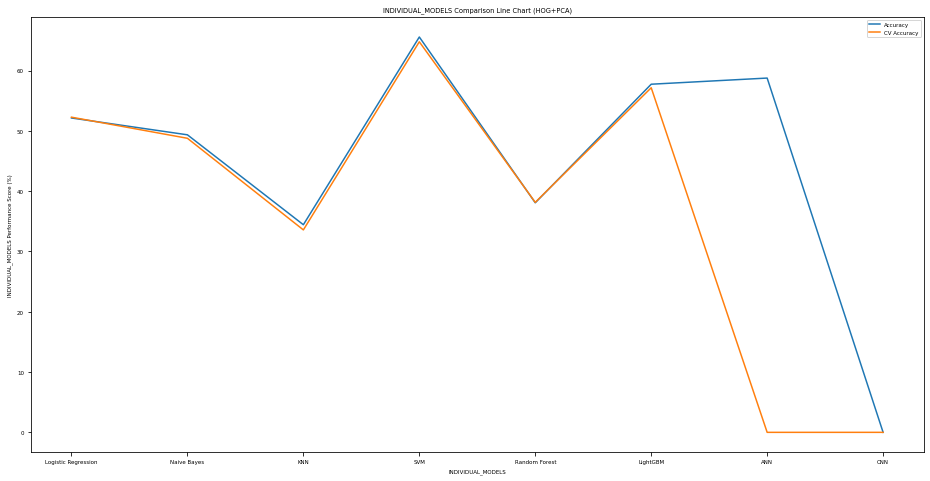

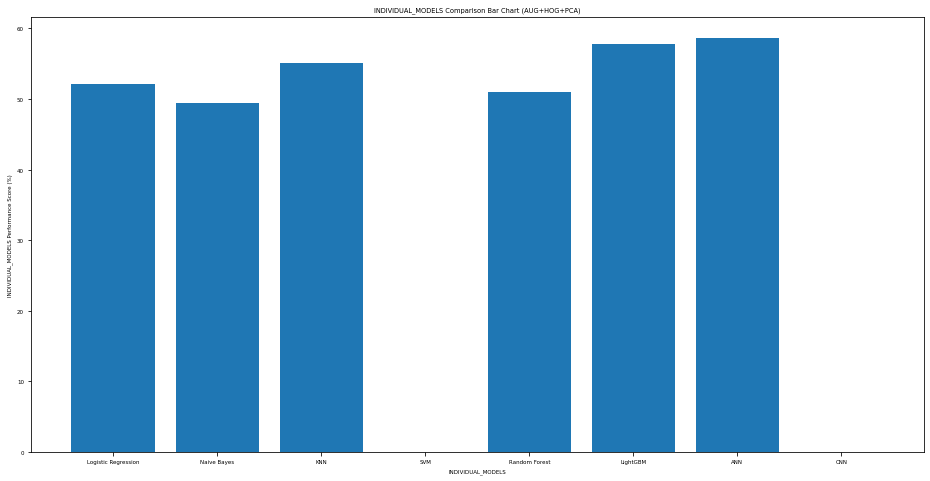

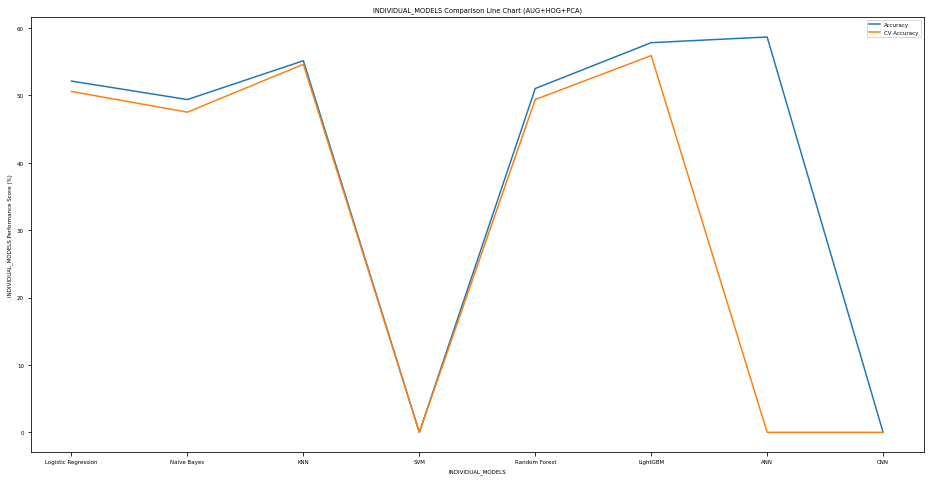

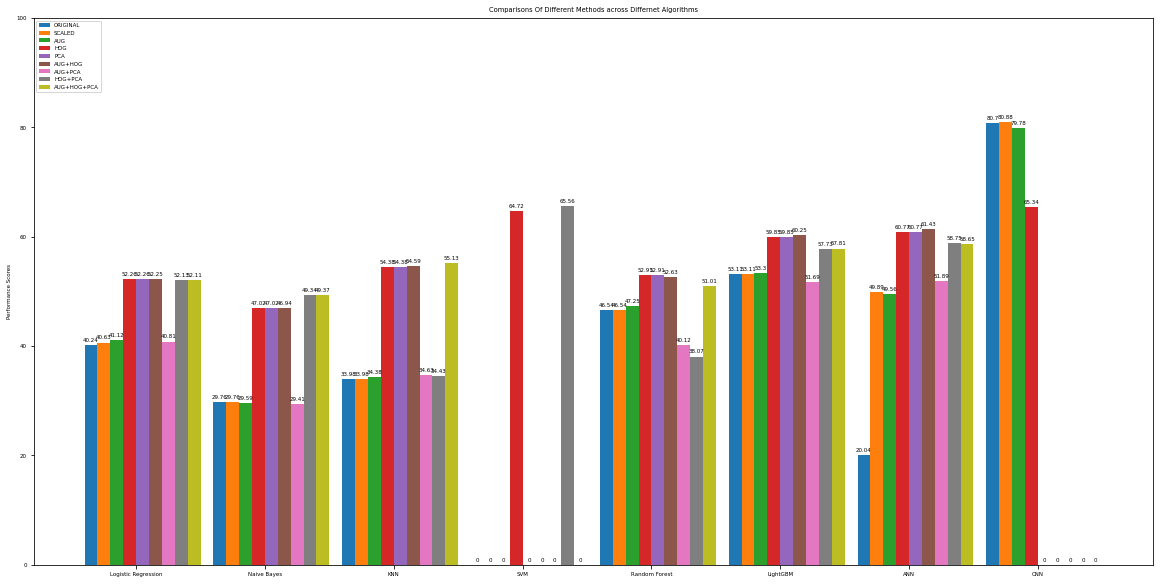

<Figure size 1440x1080 with 0 Axes>

In [12]:
def baselineModels(model,results):
    method_comparisons=list(results[model].keys())
    total_model_comparisons=len(method_comparisons)
    groups={} 

    #Loop through each comparison methods eg:ORIGINAL,SCALED,AUG...
    for methods in method_comparisons:
        algorithms=list(results[model][methods].keys())
        accuracy_scores=[]
        cv_scores=[]
        for i in range(len(algorithms)):
            accuracy_scores.append(results[model][methods][algorithms[i]][0])
            cv_scores.append(results[model][methods][algorithms[i]][1])
        groups[methods]=accuracy_scores
        barChart(model,methods,algorithms,'Performance Score',accuracy_scores)
        multipleLineChart(model,methods,algorithms,'Performance Score',accuracy_scores,cv_scores)
    groupedBarChart(groups,algorithms,model)
    return groups

groups=baselineModels(model[0],results)

### Hyperparameter Tuning

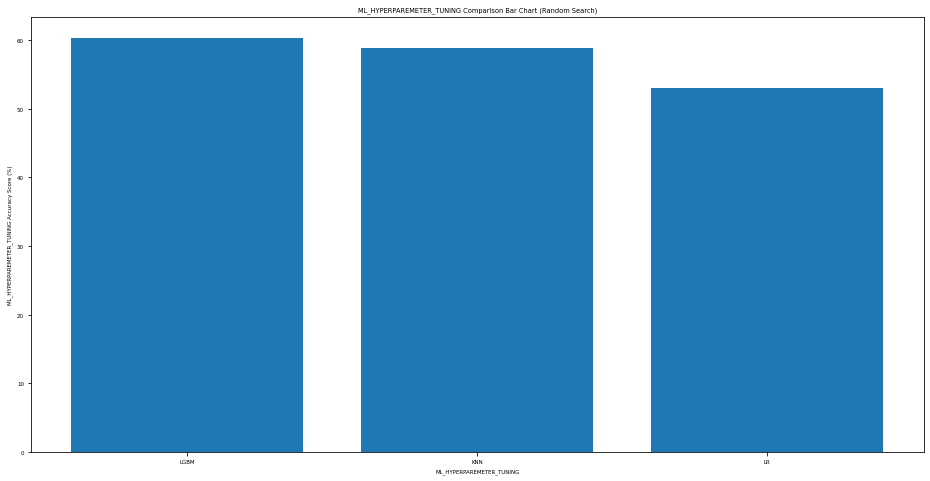

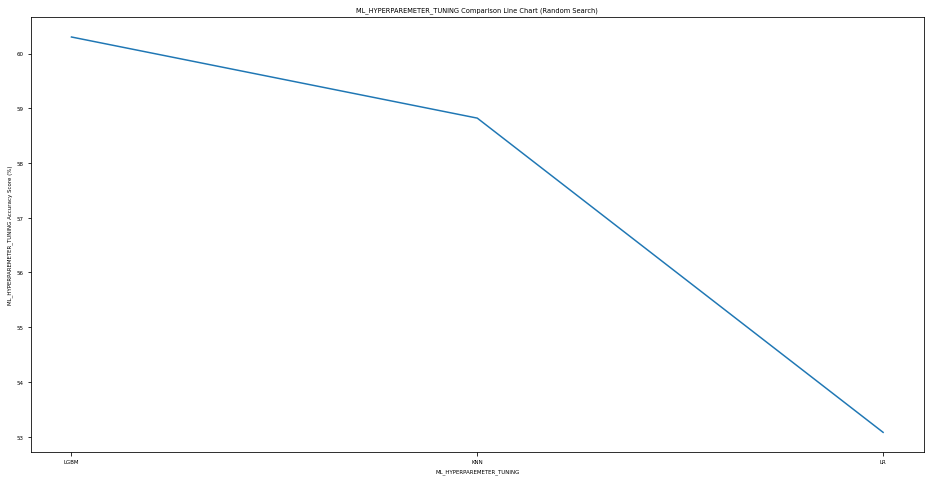

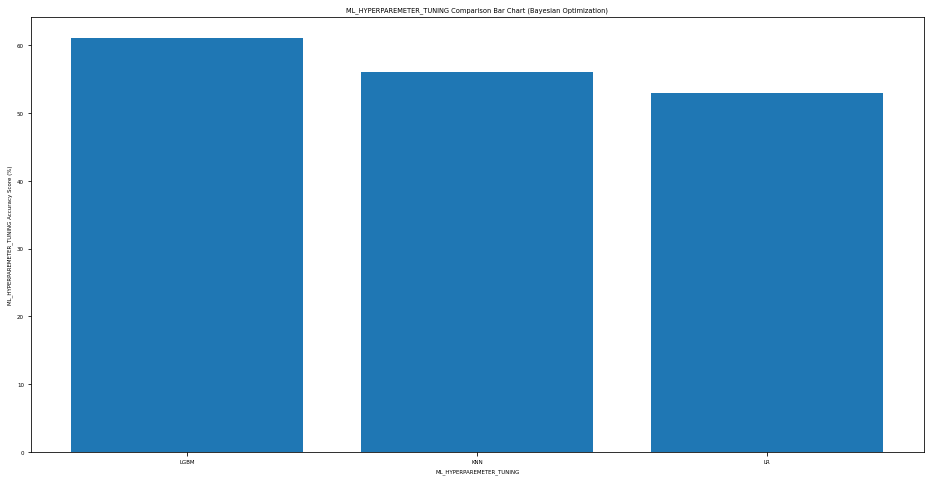

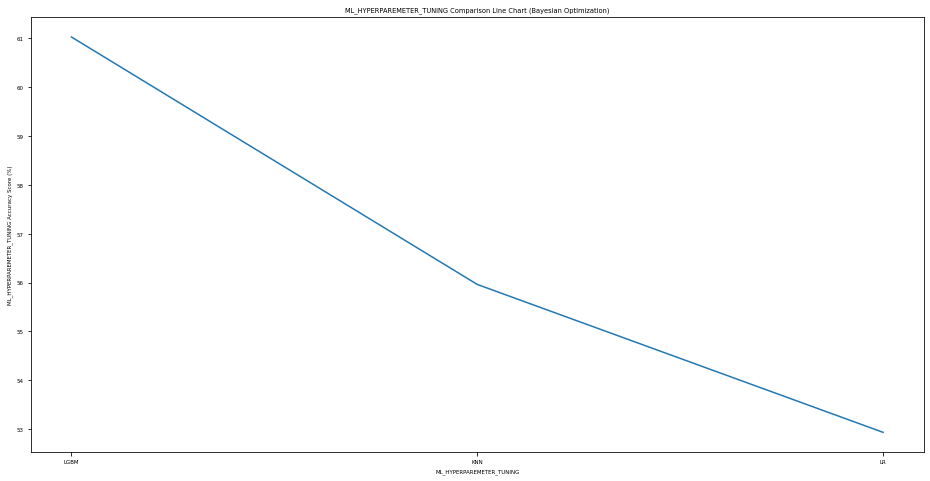

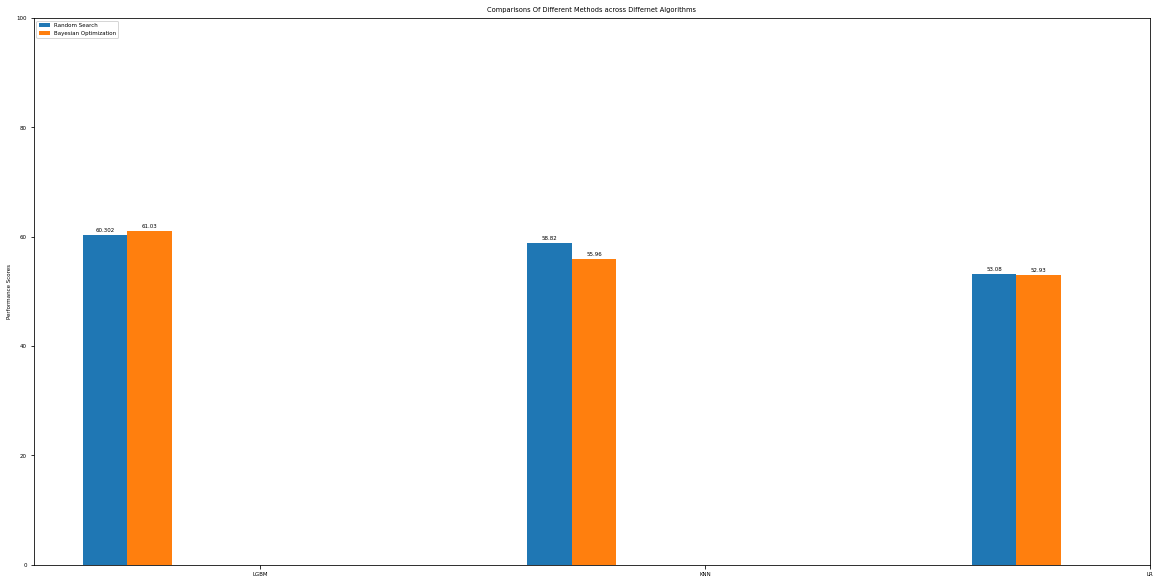

<Figure size 1440x1080 with 0 Axes>

In [13]:
def hyperparameter_tuning(model,results):
    #Method_comparisons=Random search, bayesian optimization
    method_comparisons=list(results[model].keys())
    total_model_comparisons=len(method_comparisons)
    ind_param_groups={} 

    #Loop through each comparison methods eg:ORIGINAL,SCALED,AUG...
    for methods in method_comparisons:
        algorithms=list(results[model][methods].keys())
        accuracy_scores=[]
        for i in range(len(algorithms)):
            accuracy_scores.append(results[model][methods][algorithms[i]])
        ind_param_groups[methods]=accuracy_scores
        barChart(model,methods,algorithms,'Accuracy Score',accuracy_scores)
        lineChart(model,methods,algorithms,'Accuracy Score',accuracy_scores)
    groupedBarChart(ind_param_groups,algorithms,model)
    print()
    return ind_param_groups,algorithms

ind_param_groups,ind_models=hyperparameter_tuning(model[1],results)

# Part B

### Machine Learning Enhanced Model - Voting, Stacking, Bagging

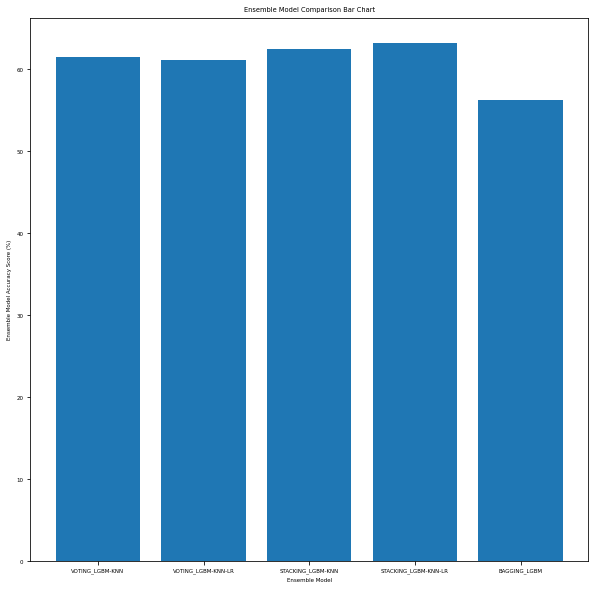

In [15]:
def ensembleModels(model,results):
    method_comparisons=results[model].keys()
    total_model_comparisons=len(method_comparisons)

    ensemble_names=[]
    ensemble_results=[]
    #Loop through each comparison methods eg:ORIGINAL,SCALED,AUG...
    for methods in method_comparisons:
        algorithms=list(results[model][methods].keys())
        for i in range(len(algorithms)):
            ensemble_results.append(results[model][methods][algorithms[i]][0])
            ensemble_names.append(methods+'_'+algorithms[i])
            
    barChart2('Ensemble Model',ensemble_names,'Accuracy Score',ensemble_results)
    return ensemble_names,ensemble_results

ensemble_names,ensemble_results=ensembleModels(model[2],results)

### Comparisons between Individual Models and Ensemble Models

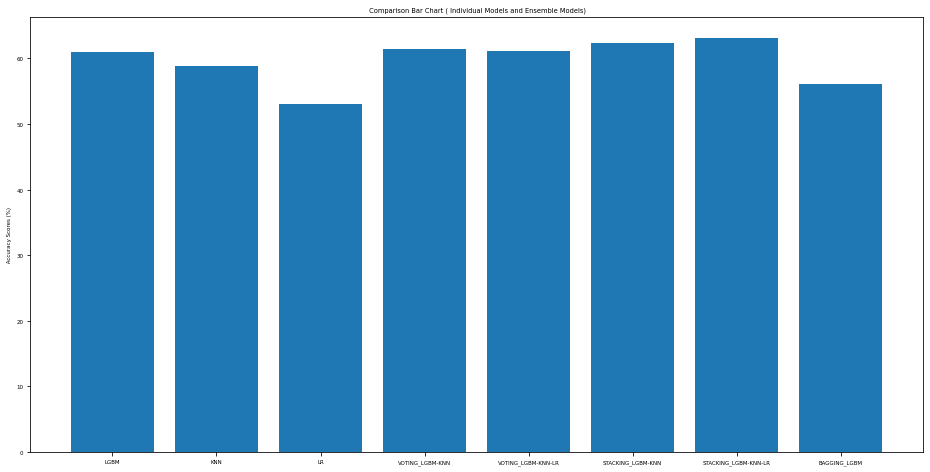

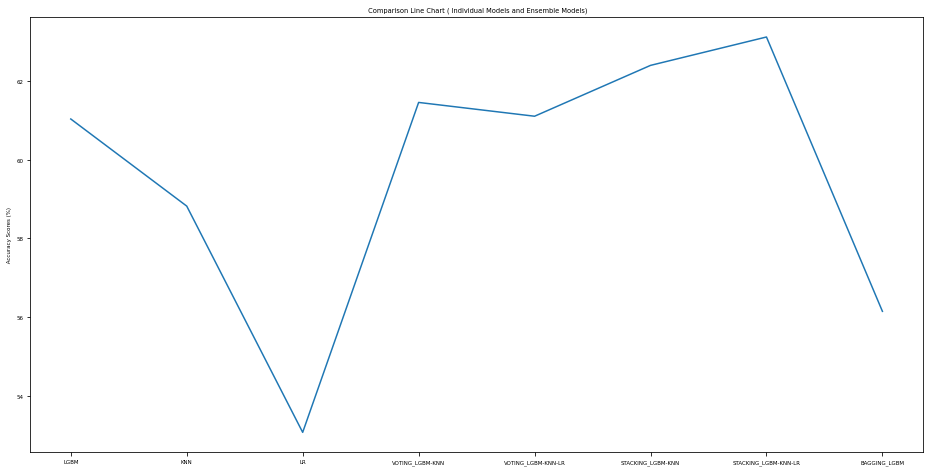

In [16]:
def comparison_Individual_Emsemble(ind_models,ensemble_names,ensemble_results,ind_param_groups):
    model_names=ind_models+ensemble_names
    accuracy=[ind_param_groups[ind_model] for ind_model in ind_param_groups.keys()]
    accuracy=[j for i in accuracy for j in i]
    param_acc=[]

    for idx in range(int(len(accuracy)/2)):
        idx1=int(len(accuracy)/3+idx+1)
        if accuracy[idx]>accuracy[idx1]:
            param_acc.append(accuracy[idx])
        else:
            param_acc.append(accuracy[idx1])
    
    model_accuracy=param_acc+ensemble_results
    barChart('',' Individual Models and Ensemble Models',model_names,'Accuracy Scores',model_accuracy)
    lineChart('',' Individual Models and Ensemble Models',model_names,'Accuracy Scores',model_accuracy)
    
comparison_Individual_Emsemble(ind_models,ensemble_names,ensemble_results,ind_param_groups)

### Deep Learning Enhanced Model - Hybrid & Ensemble

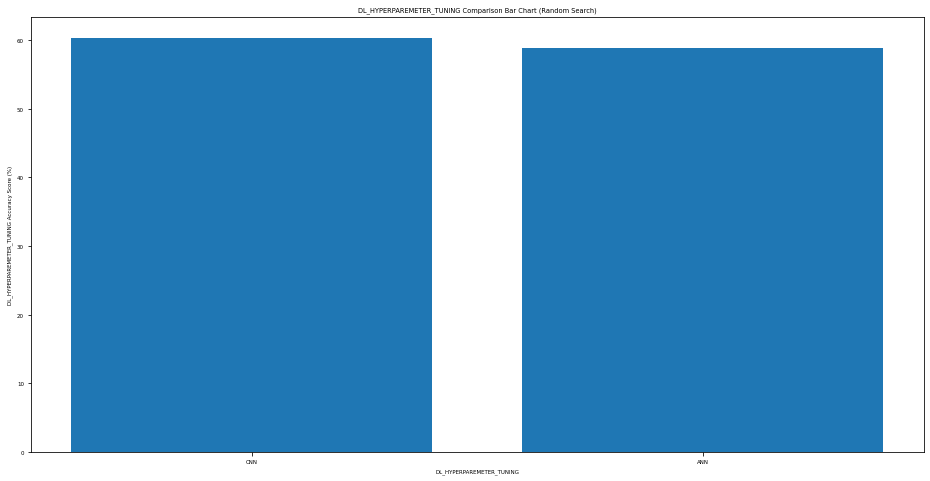

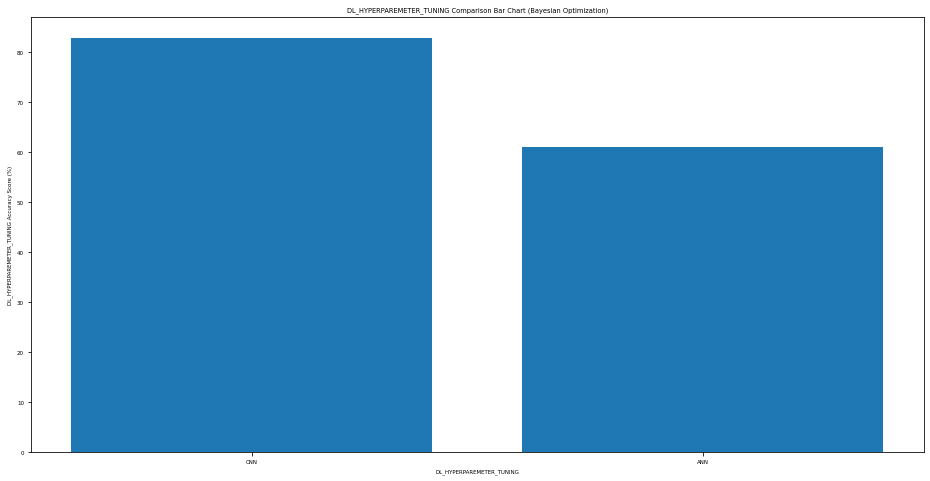

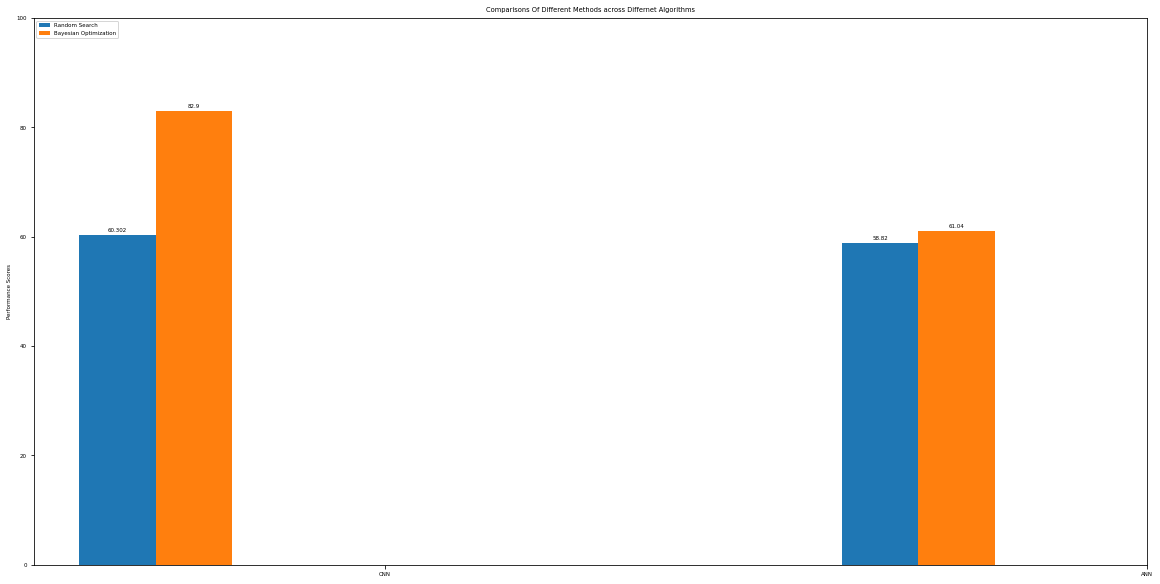

<Figure size 1440x1080 with 0 Axes>

In [17]:
def dl_parameterTuning(model,results):
    #Method_comparisons=Random search, bayesian optimization
    method_comparisons=list(results[model].keys())
    total_model_comparisons=len(method_comparisons)
    groups={} 

    for methods in method_comparisons:
        algorithms=list(results[model][methods].keys())
        accuracy_scores=[]
        for i in range(len(algorithms)):
            accuracy_scores.append(results[model][methods][algorithms[i]])
        groups[methods]=accuracy_scores
        barChart(model,methods,algorithms,'Accuracy Score',accuracy_scores)
    groupedBarChart(groups,algorithms,model)

dl_parameterTuning(model[3],results)

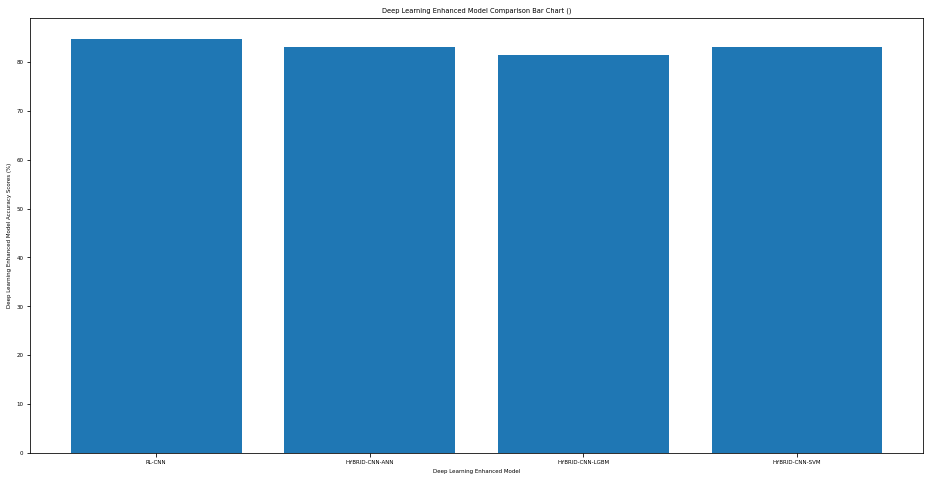

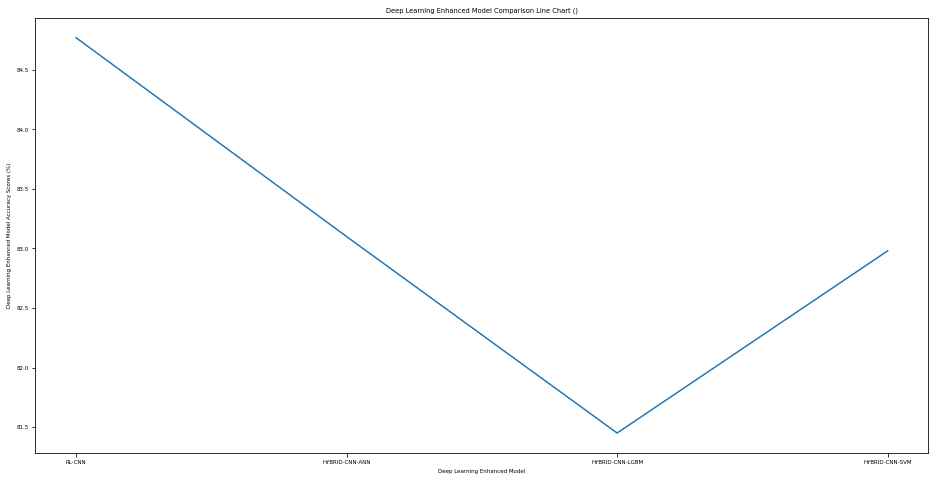

In [18]:
def dl_enhanced_model(model,results):
    model_names=list(results[model].keys())
    model_acc=[results[model][name] for name in model_names]
    barChart('Deep Learning Enhanced Model','',model_names,'Accuracy Scores',model_acc)
    lineChart('Deep Learning Enhanced Model','',model_names,'Accuracy Scores',model_acc)
dl_enhanced_model(model[4],results)

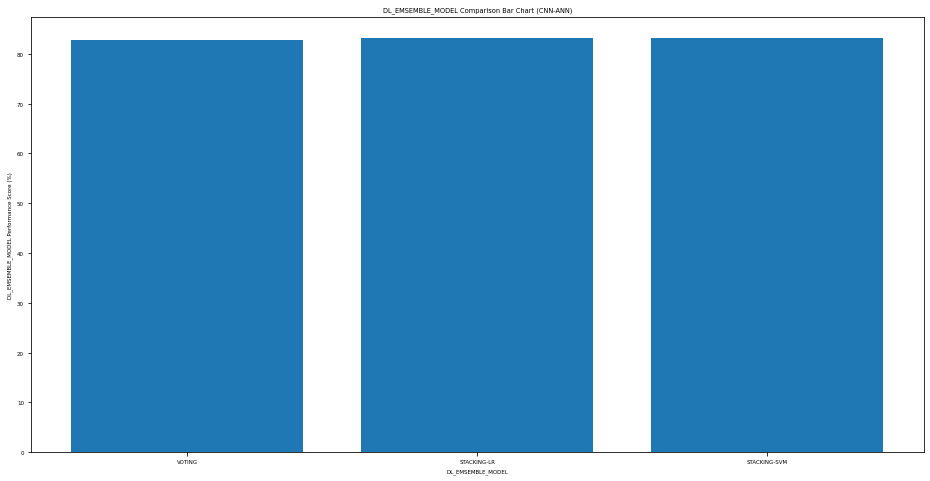

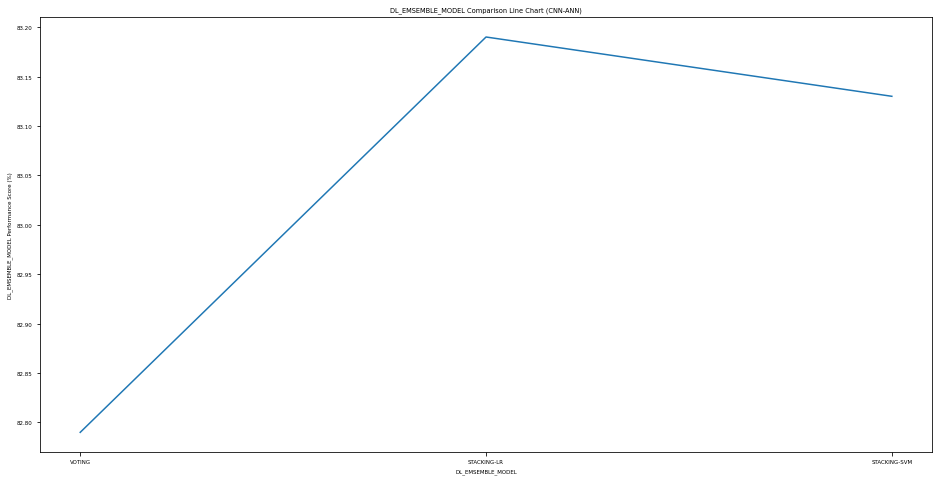

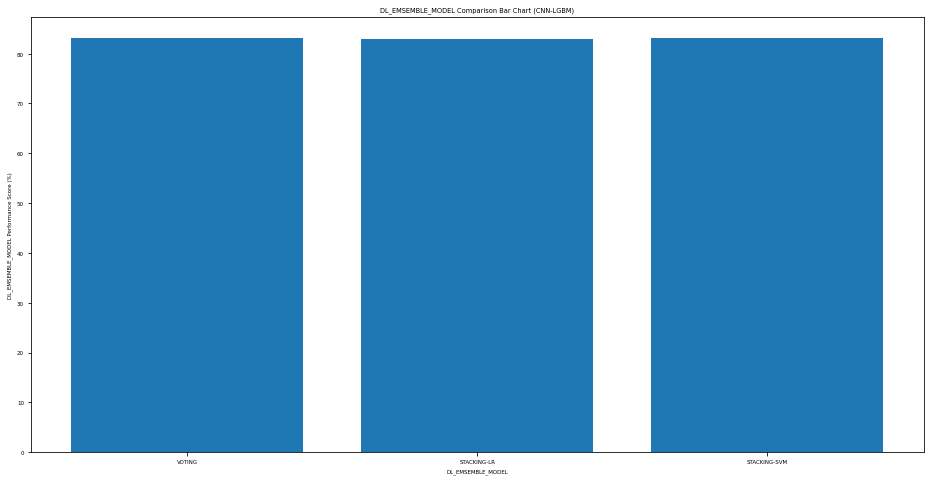

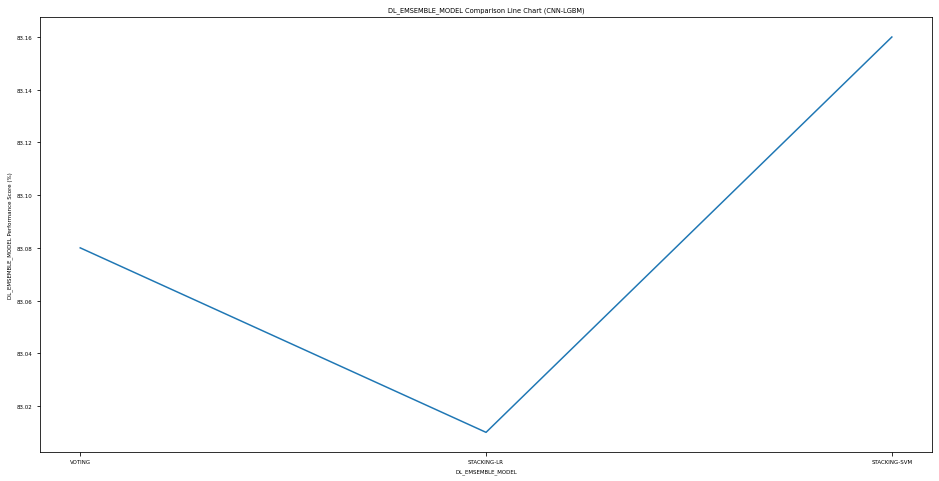

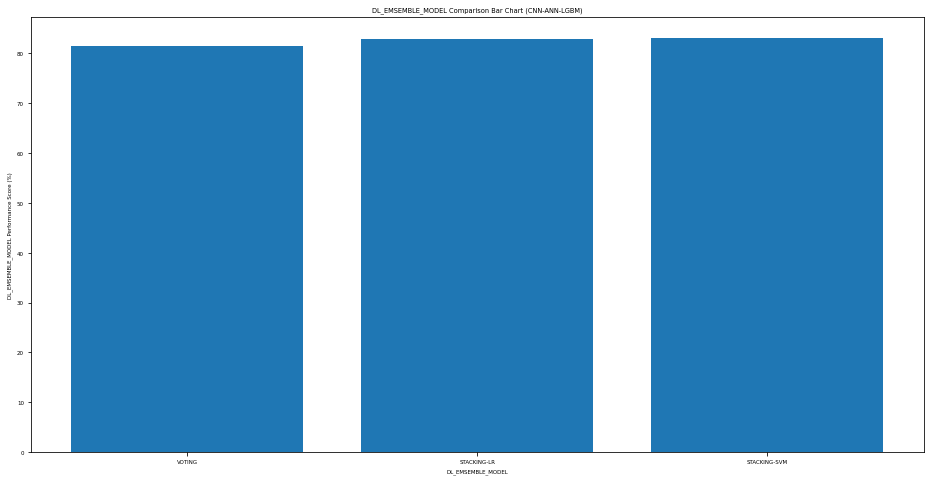

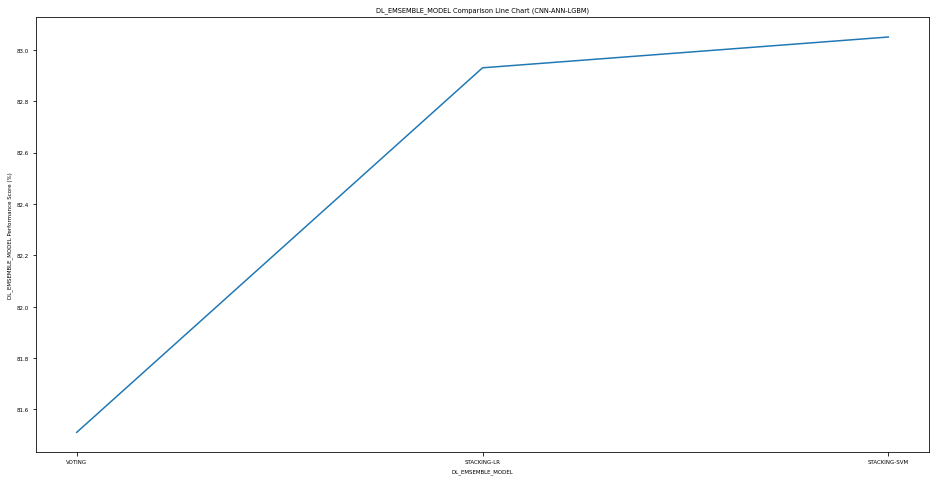

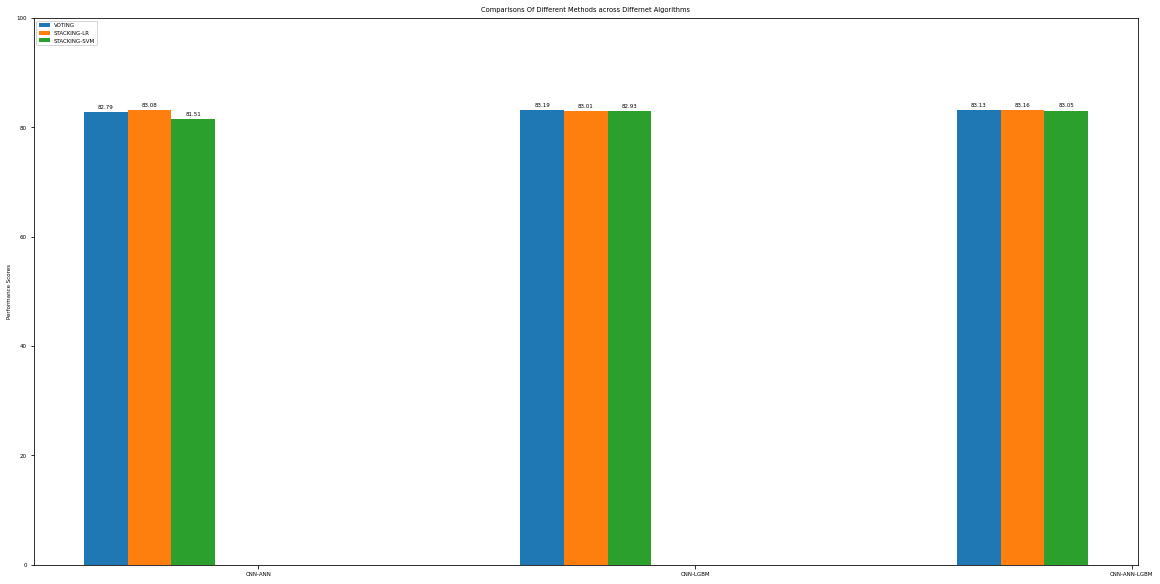

<Figure size 1440x1080 with 0 Axes>

In [20]:
def DL_ensemble_model(model,results):
    method_comparisons=list(results[model].keys())
    total_model_comparisons=len(method_comparisons)
    groups={} 
    ensemble_methods=list(results[model][list(results[model].keys())[0]].keys())
    algo=[]

    for idx,methods in enumerate(method_comparisons):
        algorithms=list(results[model][methods].keys())
        accuracy_scores=[]
        for i in range(len(algorithms)):
            accuracy_scores.append(results[model][methods][algorithms[i]])

        algo.append(methods)
        groups[ensemble_methods[idx]]=accuracy_scores
        barChart(model,methods,algorithms,'Performance Score',accuracy_scores)
        lineChart(model,methods,algorithms,'Performance Score',accuracy_scores)
   
    groupedBarChart(groups,algo,model)

DL_ensemble_model(model[5],results)